In [1]:
# libraries we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore; visualization stuff
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [4]:
prices = pd.read_csv('./data/sudowoodo_prices.csv')
prices.head(10)

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3
0,0,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN
1,1,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0
2,2,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN
3,3,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0
4,4,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN
5,5,10002,1,9996.0,2.0,9995.0,22.0,10004,2,10005.0,22.0,NaN,NaN
6,6,9996,2,9995.0,24.0,NaN,NaN,10002,9,10004.0,2.0,10005.0,24.0
7,7,9998,7,9995.0,27.0,NaN,NaN,10005,27,NaN,NaN,NaN,NaN
8,8,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN
9,9,9996,2,9995.0,27.0,NaN,NaN,10004,2,10005.0,27.0,NaN,NaN


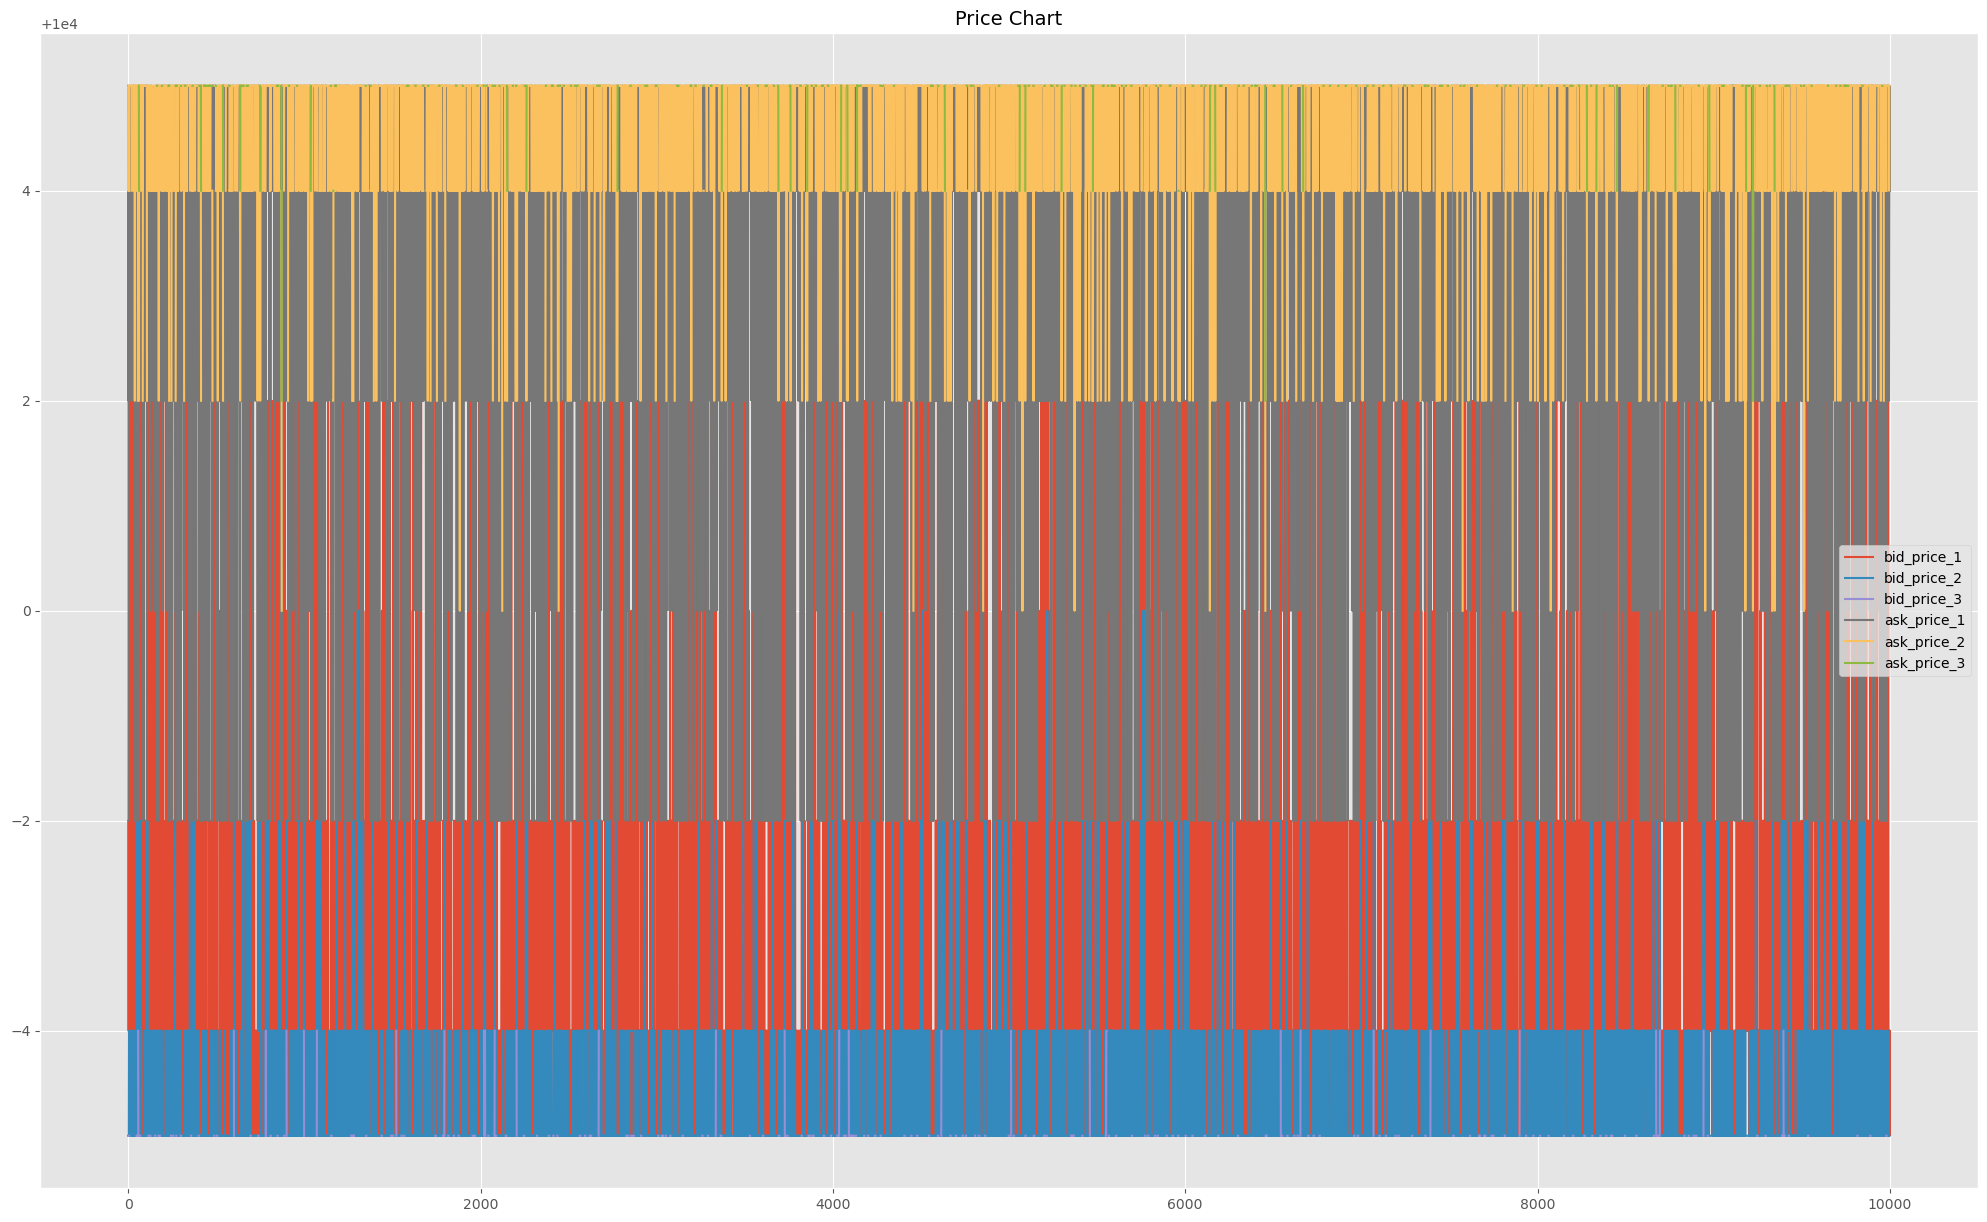

In [5]:
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
# bv1 = prices['bid_volume_1']
# bv2 = prices['bid_volume_2']
# bv3 = prices['bid_volume_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']
# av1 = prices['ask_volume_1']
# av2 = prices['ask_volume_2']
# av3 = prices['ask_volume_3']

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

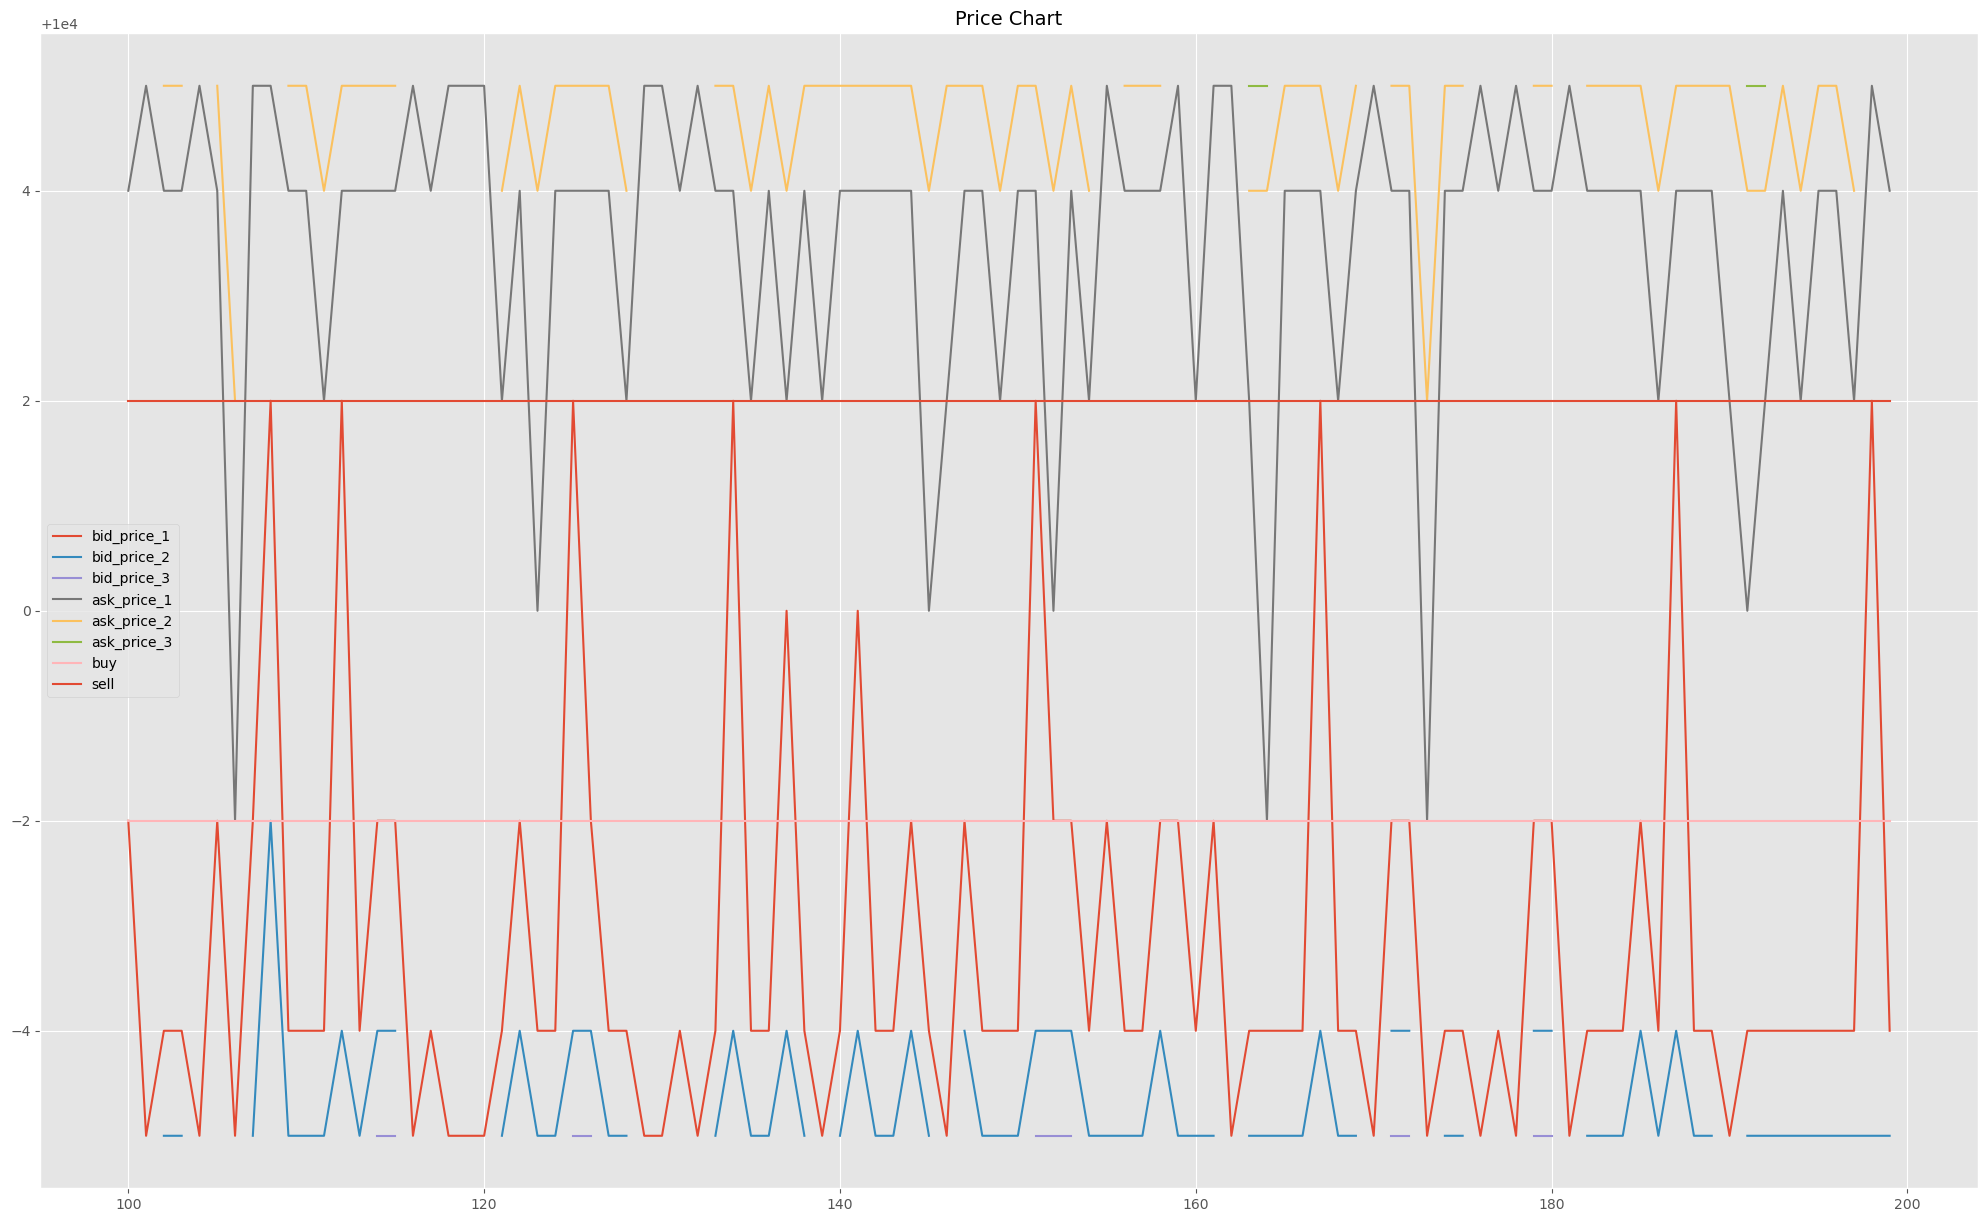

In [6]:
# slice
prices_sliced = prices[100:200]

# copy paste our previous cell and hit run
ts = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']

sell = np.full_like(ts, 10002)
buy = np.full_like(ts, 9998)

plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
    'buy': buy,
    'sell': sell
}

for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

In [7]:
prices['mid_price'] = (prices['ask_price_1'] + prices['bid_price_1']) / 2  #midprice
print(prices['mid_price'])

0       10001.5
1        9999.0
2       10000.0
3        9997.0
4       10001.0
         ...   
9995     9998.5
9996     9999.0
9997    10000.0
9998    10000.0
9999    10000.0
Name: mid_price, Length: 10000, dtype: float64


In [8]:
window = 20
prices['rolling_mean'] = prices['mid_price'].rolling(window=window).mean()
print(prices['rolling_mean'])
prices['rolling_std'] = prices['mid_price'].rolling(window=window).std()
prices['upper_band'] = prices['rolling_mean'] + 2 * prices['rolling_std']
prices['lower_band'] = prices['rolling_mean'] - 2 * prices['rolling_std']
prices['z_score'] = (prices['mid_price'] - prices['rolling_mean']) / prices['rolling_std']
prices['returns'] = prices['mid_price'].pct_change()
prices['volatility'] = prices['returns'].rolling(window=window).std()

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
9995    10000.375
9996    10000.150
9997    10000.300
9998    10000.300
9999    10000.300
Name: rolling_mean, Length: 10000, dtype: float64


In [9]:
print(prices['z_score'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
9995   -0.966974
9996   -0.633813
9997   -0.180993
9998   -0.180993
9999   -0.180993
Name: z_score, Length: 10000, dtype: float64


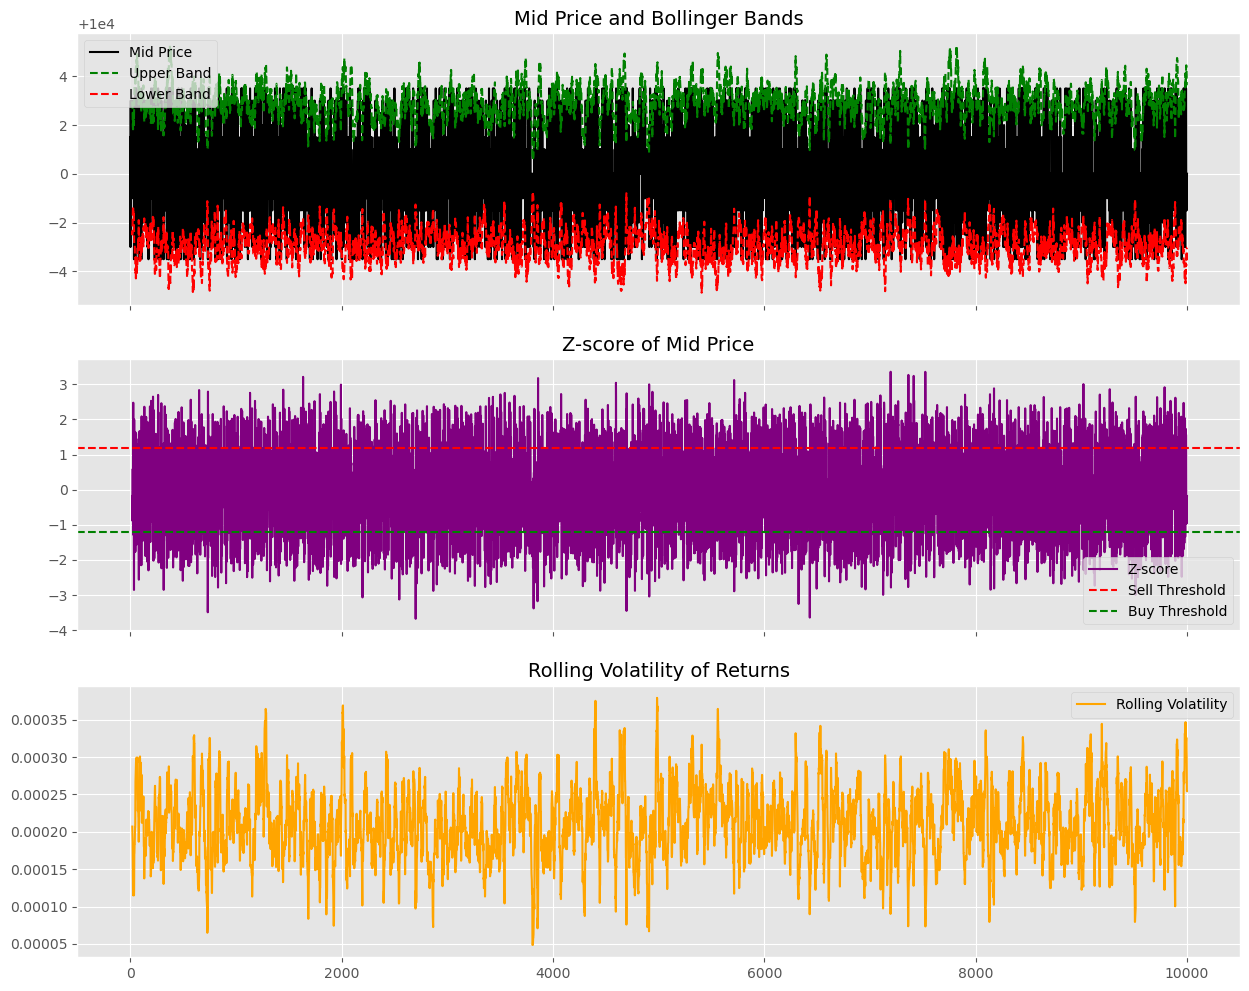

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
axs[0].plot(prices['timestamp'], prices['mid_price'], label='Mid Price', color='black')
axs[0].plot(prices['timestamp'], prices['upper_band'], label='Upper Band', linestyle='--', color='green')
axs[0].plot(prices['timestamp'], prices['lower_band'], label='Lower Band', linestyle='--', color='red')
axs[0].set_title("Mid Price and Bollinger Bands")
axs[0].legend()

axs[1].plot(prices['timestamp'], prices['z_score'], label='Z-score', color='purple')
axs[1].axhline(1.2, color='red', linestyle='--', label='Sell Threshold')
axs[1].axhline(-1.2, color='green', linestyle='--', label='Buy Threshold')
axs[1].set_title("Z-score of Mid Price")
axs[1].legend()

axs[2].plot(prices['timestamp'], prices['volatility'], label='Rolling Volatility', color='orange')
axs[2].set_title("Rolling Volatility of Returns")
axs[2].legend()